## Few terms to Keep in mind 🧠
While dealing with the audio data , there are few terminologies which we must know , so here I will be mentioning some of the introductory definitions of the terms for just getting started with working on audio data.
1. Frequency(Hz) : Frequency is just the difference between the wavelengths
2. Intensity(db/power) :  Intensity of wave is simply the height of the wave
3. Sample rate : Resolution of audio file


##  Imorting libraries and dependencies
In order to deal with the audio data , we can use different libraries but in this project we will be using librosa and IPython.display whcih is a package that provides a lot of classes to display rich media object in jupyter notebook directly and immediately.In addition to it we will also import matplot.pyplot for the visualizations.

In [1]:
# To work with audio and perform analysis on it. 
import librosa
import librosa.display

from glob import glob

# To play sound in the notebook
import IPython.display as ipd 

# For the visualizations
import matplotlib.pyplot as plt

# For creating ,removing or fetching the contents of a directory (folder)
import os

# For creating the dataframe and doing linear algebra
import pandas as pd
import numpy as np

# To connect matplotlib backend to inline backend
%matplotlib inline

## Step 2 :  Creating dataframes using files and folders
For this project we will be combining the data of 3 differnt directories ( folders ) , so before concatination of the files we need to create dataframe of the files in folder . 

First we have chosen SAVEE folder and we will iterative through each and every file in this folder and based on alphabets such as (_a,_d,_f,_h,_n,_sa,_su) we will label the files as : ( angry , disgust , fear , happy , neutral , sad , surprise and error)

In [2]:
SAVEE = (r"C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Speech recoginition\Savee")
dir_list = os.listdir(SAVEE)
dir_list.sort()

# Now we will parse (analyze the directory specifically) to get the emotions
emotion = [] 
path = []
for i in dir_list:
    if i[2:4]=='_a':
        emotion.append('male_angry')
    elif i[2:4]=='_d':
        emotion.append('male_disgust')
    elif i[2:4]=='_f':
        emotion.append('male_fear')
    elif i[2:4]=='_h':
        emotion.append('male_happy')
    elif i[2:4]=='_n':
        emotion.append('male_neutral')
    elif i[2:5]=='_sa':
        emotion.append('male_sad')
    elif i[2:5]=='_su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE +'\\'+ i)
    
# Now we will create dataframe of the emotion list and path
SAVEE_emotions = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_path = pd.DataFrame(path, columns = ['path'])

# Creating another columns in SAVEE_emotions for mentioning about the directory the path belongs to
SAVEE_emotions['Belongs'] = 'SAVEE'

# Concatination both dataframes ( SAVEE_emotions and SAVEE_path )
SAVEE_data = pd.concat([SAVEE_emotions,SAVEE_path], axis = 1)
# SAVEE_df.labels.value_counts()
SAVEE_data

,labels,Belongs,path
0,male_angry,SAVEE,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
1,male_angry,SAVEE,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
2,male_angry,SAVEE,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
3,male_angry,SAVEE,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
4,male_angry,SAVEE,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
...,...,...,...
475,male_surprise,SAVEE,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
476,male_surprise,SAVEE,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
477,male_surprise,SAVEE,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
478,male_surprise,SAVEE,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...


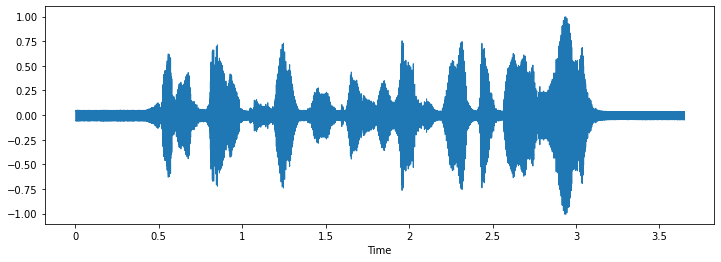

In [3]:
# Let's listen 1 audio from (SAVEE_data) dataframe
test_audio = (SAVEE_data['path'][0])  
data, sampling_rate = librosa.load(test_audio)  # Caculating the data and sampling rate

plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)

# For playing the audio in jupyter notebook 
ipd.Audio(test_audio)

Just like for SAVEE folder , we will create dataframe for both Ravdess and Tess folder

In [4]:
Tess = (r"C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Speech recoginition\Tess")
dir_list = os.listdir(Tess) # This will return all the folder in Tees folder in form of list

# Sorting directories on basis of size , as the list which we get in return from os.listdir() method are not in sorted manner
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [5]:
emotion = []
path = []
for i in dir_list:
    folder_name = os.listdir(Tess + "\\" + i) # This would be the complete path of particular file in folder
    for f in folder_name:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(Tess + "\\" + i + "\\" + f)
         
                    
# Now we will create the dataframe of the lists
Tess_emotions = pd.DataFrame(emotion , columns = ['labels'])
Tess_path = pd.DataFrame(path , columns = ['path'])
                    
# Now we will add another column in the Tess_emotions for mentioning about the directory the path belongs to
Tess_emotions['Belongs'] = 'Tess'

# Conctinating both the dataframes
Tess_data = pd.concat([Tess_emotions,Tess_path], axis = 1)   
Tess_data

,labels,Belongs,path
0,female_fear,Tess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
1,female_fear,Tess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
2,female_fear,Tess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
3,female_fear,Tess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
4,female_fear,Tess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
...,...,...,...
2795,female_sad,Tess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
2796,female_sad,Tess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
2797,female_sad,Tess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
2798,female_sad,Tess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...


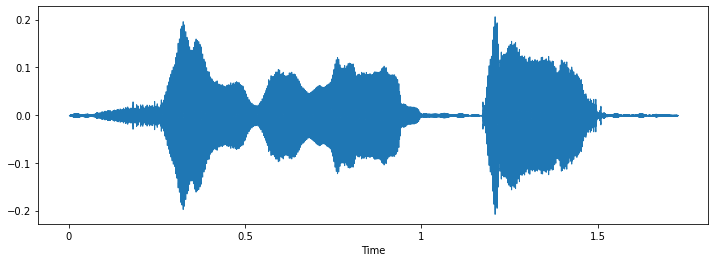

In [6]:
# Let's listen 1 audio from (Tess_data) dataframe
test_audio = (Tess_data['path'][0])  
data, sampling_rate = librosa.load(test_audio)  # Caculating the data and sampling rate

plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)

# For playing the audio in jupyter notebook 
ipd.Audio(test_audio)

In [7]:
Rav = (r"C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Speech recoginition\Ravdess")
dir_list = os.listdir(Rav) # This will return all the folder in Tees folder in form of list

# Sorting directories on basis of size , as the list which we get in return from os.listdir() method are not in sorted manner
dir_list.sort()
dir_list

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [8]:
emotion = []
gender = []
path = []
for i in dir_list:
    folder_name = os.listdir(Rav + "\\" + i)
    for f in folder_name:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(Rav + '\\' + i + '\\' + f)

In [9]:
# Now we will create dataframe of the lists        
Rav_emotions = pd.DataFrame(emotion)
Rav_gender = pd.DataFrame(gender)

# Replacing integer values with emotional tags
Rav_emotions = Rav_emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})

# Concatinating Rav_emotions and Rav_gender dataframe
Rav_data = pd.concat([Rav_gender , Rav_emotions],axis=1)

# Giving columns names to the concatinated dataframe
Rav_data.columns = ['gender','emotion']

# Making another column with combination of Rav_gender and Rav_emotion value
Rav_data['labels'] =Rav_data.gender + '_' + Rav_data.emotion

# Dropping the gender and emotion column
Rav_data = Rav_data.drop(['gender','emotion'],axis = 1)

# Making column for mentioning of the folder the data belong to
Rav_data['Belongs'] = 'Ravdess'
Rav_data = pd.concat([Rav_data,pd.DataFrame(path, columns = ['path'])],axis=1)
Rav_data

,labels,Belongs,path
0,male_neutral,Ravdess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
1,male_neutral,Ravdess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
2,male_neutral,Ravdess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
3,male_neutral,Ravdess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
4,male_neutral,Ravdess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
...,...,...,...
1435,female_surprise,Ravdess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
1436,female_surprise,Ravdess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
1437,female_surprise,Ravdess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
1438,female_surprise,Ravdess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...


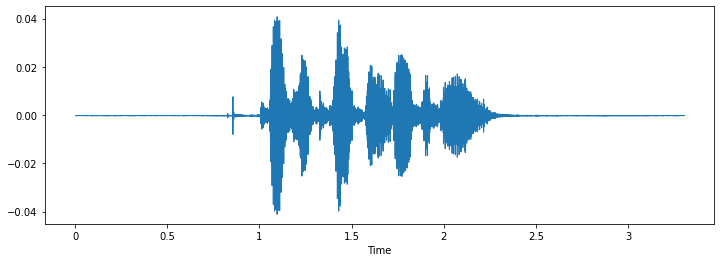

In [10]:
# Let's listen 1 audio from (Tess_data) dataframe
test_audio = (Rav_data['path'][0])  
data, sampling_rate = librosa.load(test_audio)  # Caculating the data and sampling rate

plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)

# For playing the audio in jupyter notebook 
ipd.Audio(test_audio)

Creating final dataframe using all the above 3 dataframes

In [11]:
audio_data = pd.concat([SAVEE_data, Rav_data, Tess_data], axis = 0)
audio_data.to_csv("Data_path.csv",index=False)

In [12]:
audio_data.sample(10)

,labels,Belongs,path
1136,female_happy,Tess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
394,male_angry,Ravdess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
1133,female_happy,Tess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
1155,female_happy,Ravdess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
2158,female_happy,Tess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
694,female_angry,Ravdess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
76,female_happy,Ravdess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
678,female_angry,Tess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
241,female_surprise,Tess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
186,male_neutral,SAVEE,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...


In [13]:
# We will try to get feature from this data itself
data

array([ 1.6517616e-08, -6.5464434e-08,  1.2522355e-07, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)

## Feature extraction MFCC

In [14]:
audio_data['path'][0]

0    C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
0    C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
0    C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...
Name: path, dtype: object

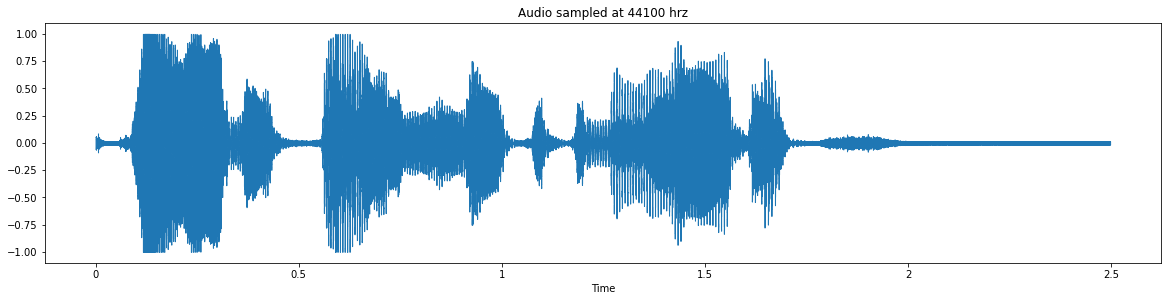

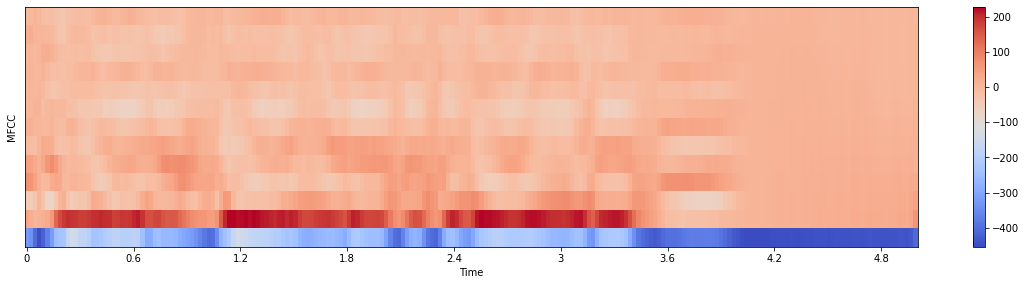

In [18]:
# First of all in order to understand how to extract feature using MFCC we will extract features of one of the audio file

path = (r"C:\Users\YUVRAJ\Desktop\Machine Learning\PROJECTS\Speech recoginition\Savee\DC_a05.wav")


X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)

#Here we are displaying Spectrogram for the audio file
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

In [22]:
# Now lets extract this feature for entire dataset and then concatinate this feature column into our dataframe
dataframe = pd.DataFrame(columns=['feature'])

# loop for the feature extraction from the entire dataset
counter=0
for index,path in enumerate(audio_data.path):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    dataframe.loc[counter] = [mfccs]
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(dataframe))
dataframe.head()

4720


,feature
0,"[-4.641421, -3.860898, -6.2191906, -5.9265423,..."
1,"[-8.690717, -12.522838, -22.928043, -23.243807..."
2,"[-8.81486, -12.819055, -24.178183, -23.84745, ..."
3,"[-2.2684255, -4.317077, -12.285238, -13.083024..."
4,"[-13.485307, -16.260424, -25.884357, -27.82704..."


In [29]:
# First we will create a dataframe for feature column values

# Now we will concatinate the feature dataframe with audio_data dataframe
audio_data.reset_index(inplace=True, drop=True)
audio_data = pd.concat([audio_data,pd.DataFrame(dataframe['feature'].values.tolist())],axis=1)
audio_data

,labels,Belongs,path,0,1,2,3,4,5,6,...,206,207,208,209,210,211,212,213,214,215
0,male_angry,SAVEE,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...,-4.641421,-3.860898,-6.219191,-5.926542,-5.850419,-4.808960,-2.513003,...,-4.088851,-5.023864,-5.254715,-5.234094,-5.310308,-5.621666,-6.072197,-6.611348,-3.999875,1.390506
1,male_angry,SAVEE,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...,-8.690717,-12.522838,-22.928043,-23.243807,-22.926605,-23.432243,-14.830002,...,-22.627258,-22.633406,-22.511599,-24.300154,-24.496809,-22.895985,-23.511503,-24.342152,-16.465857,-8.936035
2,male_angry,SAVEE,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...,-8.814860,-12.819055,-24.178183,-23.847450,-15.182783,-10.732485,-8.681472,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,male_angry,SAVEE,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...,-2.268425,-4.317077,-12.285238,-13.083024,-12.041327,-11.819768,-9.414148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,male_angry,SAVEE,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...,-13.485307,-16.260424,-25.884357,-27.827044,-27.593534,-26.666508,-18.659025,...,-25.291666,-25.854906,-26.821354,-25.436455,-24.179941,-23.281618,-24.167494,-25.228062,-20.599659,-15.929615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4715,female_sad,Tess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...,-11.287771,-16.221346,-27.121141,-27.836124,-28.847008,-29.178606,-27.069998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4716,female_sad,Tess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...,-15.503607,-18.943548,-24.994427,-24.650627,-26.141462,-25.772657,-25.774822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4717,female_sad,Tess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...,-8.939459,-13.455706,-26.001451,-24.658154,-23.354696,-22.874725,-23.062086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4718,female_sad,Tess,C:\Users\YUVRAJ\Desktop\Machine Learning\PROJE...,-16.617596,-19.063950,-28.386200,-27.253950,-28.042349,-27.384907,-27.023069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
